# Similarity - TF-IDF

In [1]:
import pandas as pd 

### Read in data

In [3]:
df_songs_tfidf = pd.read_csv('../CSV/songs_lem_pl_tfidf.csv', header=0,index_col=False)
print(df_songs_tfidf.shape)
#df_songs_tfidf.reset_index(inplace=True)
df_songs_tfidf.head()

(186, 77)


,alleluja,amen,bać,boży,bóg,błogosławić,chcieć,chleb,chrystus,chwalić,...,wierzyć,woda,wszystek,ziemia,łaska,śpiewać,świat,święty,życie,żyć
0,0.000000,0.000000,0.0,0.000000,0.048689,0.0,0.0,0.0,0.090033,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.132846,0.0
1,0.905161,0.048297,0.0,0.000000,0.024980,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.044389,0.037458,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.177531,0.0,0.0,0.0,0.000000,0.0,...,0.343242,0.000000,0.000000,0.0,0.000000,0.0,0.269728,0.000000,0.242194,0.0
3,0.000000,0.000000,0.0,0.521322,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.159478,0.0,0.000000,0.247455,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.123690,0.0,0.287778,0.0,0.000000,0.105767,0.000000,0.0


In [4]:
df_readings_tfidf = pd.read_csv('../CSV/readings_pl_lem_tfidf.csv', header=0,index_col=False)
print(df_readings_tfidf.shape)
#df_songs_tfidf.reset_index(inplace=True)
df_readings_tfidf.head()

(87, 77)


,alleluja,amen,bać,boży,bóg,błogosławić,chcieć,chleb,chrystus,chwalić,...,wierzyć,woda,wszystek,ziemia,łaska,śpiewać,świat,święty,życie,żyć
0,0.0,0.0,0.125171,0.000000,0.132490,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.00000,0.198674,0.365483,0.115559,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,0.074652,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.00000,0.111944,0.102967,0.000000,0.000000,0.0,0.095723,0.101843,0.123754
2,0.0,0.0,0.000000,0.000000,0.054863,0.106072,0.000000,0.0,0.0,0.0,...,0.0,0.09749,0.082269,0.227015,0.000000,0.000000,0.0,0.140696,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.074494,0.144028,0.000000,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.205499,0.129950,0.108923,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.097685,0.475442,0.000000,0.072864,0.0,0.0,0.0,...,0.0,0.00000,0.079216,0.072864,0.000000,0.077242,0.0,0.067738,0.000000,0.000000


## Cosine similarity

-> trzeba zbudować wspólny zbiór cech

In [5]:
#sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [6]:
sim = cosine_similarity(df_songs_tfidf, df_readings_tfidf)
#mask = sim >= 0.5

In [11]:
df_songs = pd.read_csv('../CSV/prep_songs_pl_lem_stop_wcrft1.csv', header=0, index_col=None)
df_readings = pd.read_csv('../CSV/prep_readings_pl_lem_stop_wcrft1.csv', header=0, index_col=None)
titles = np.array(df_songs['title'])
dates = np.array(df_readings['date'])
#print(titles)

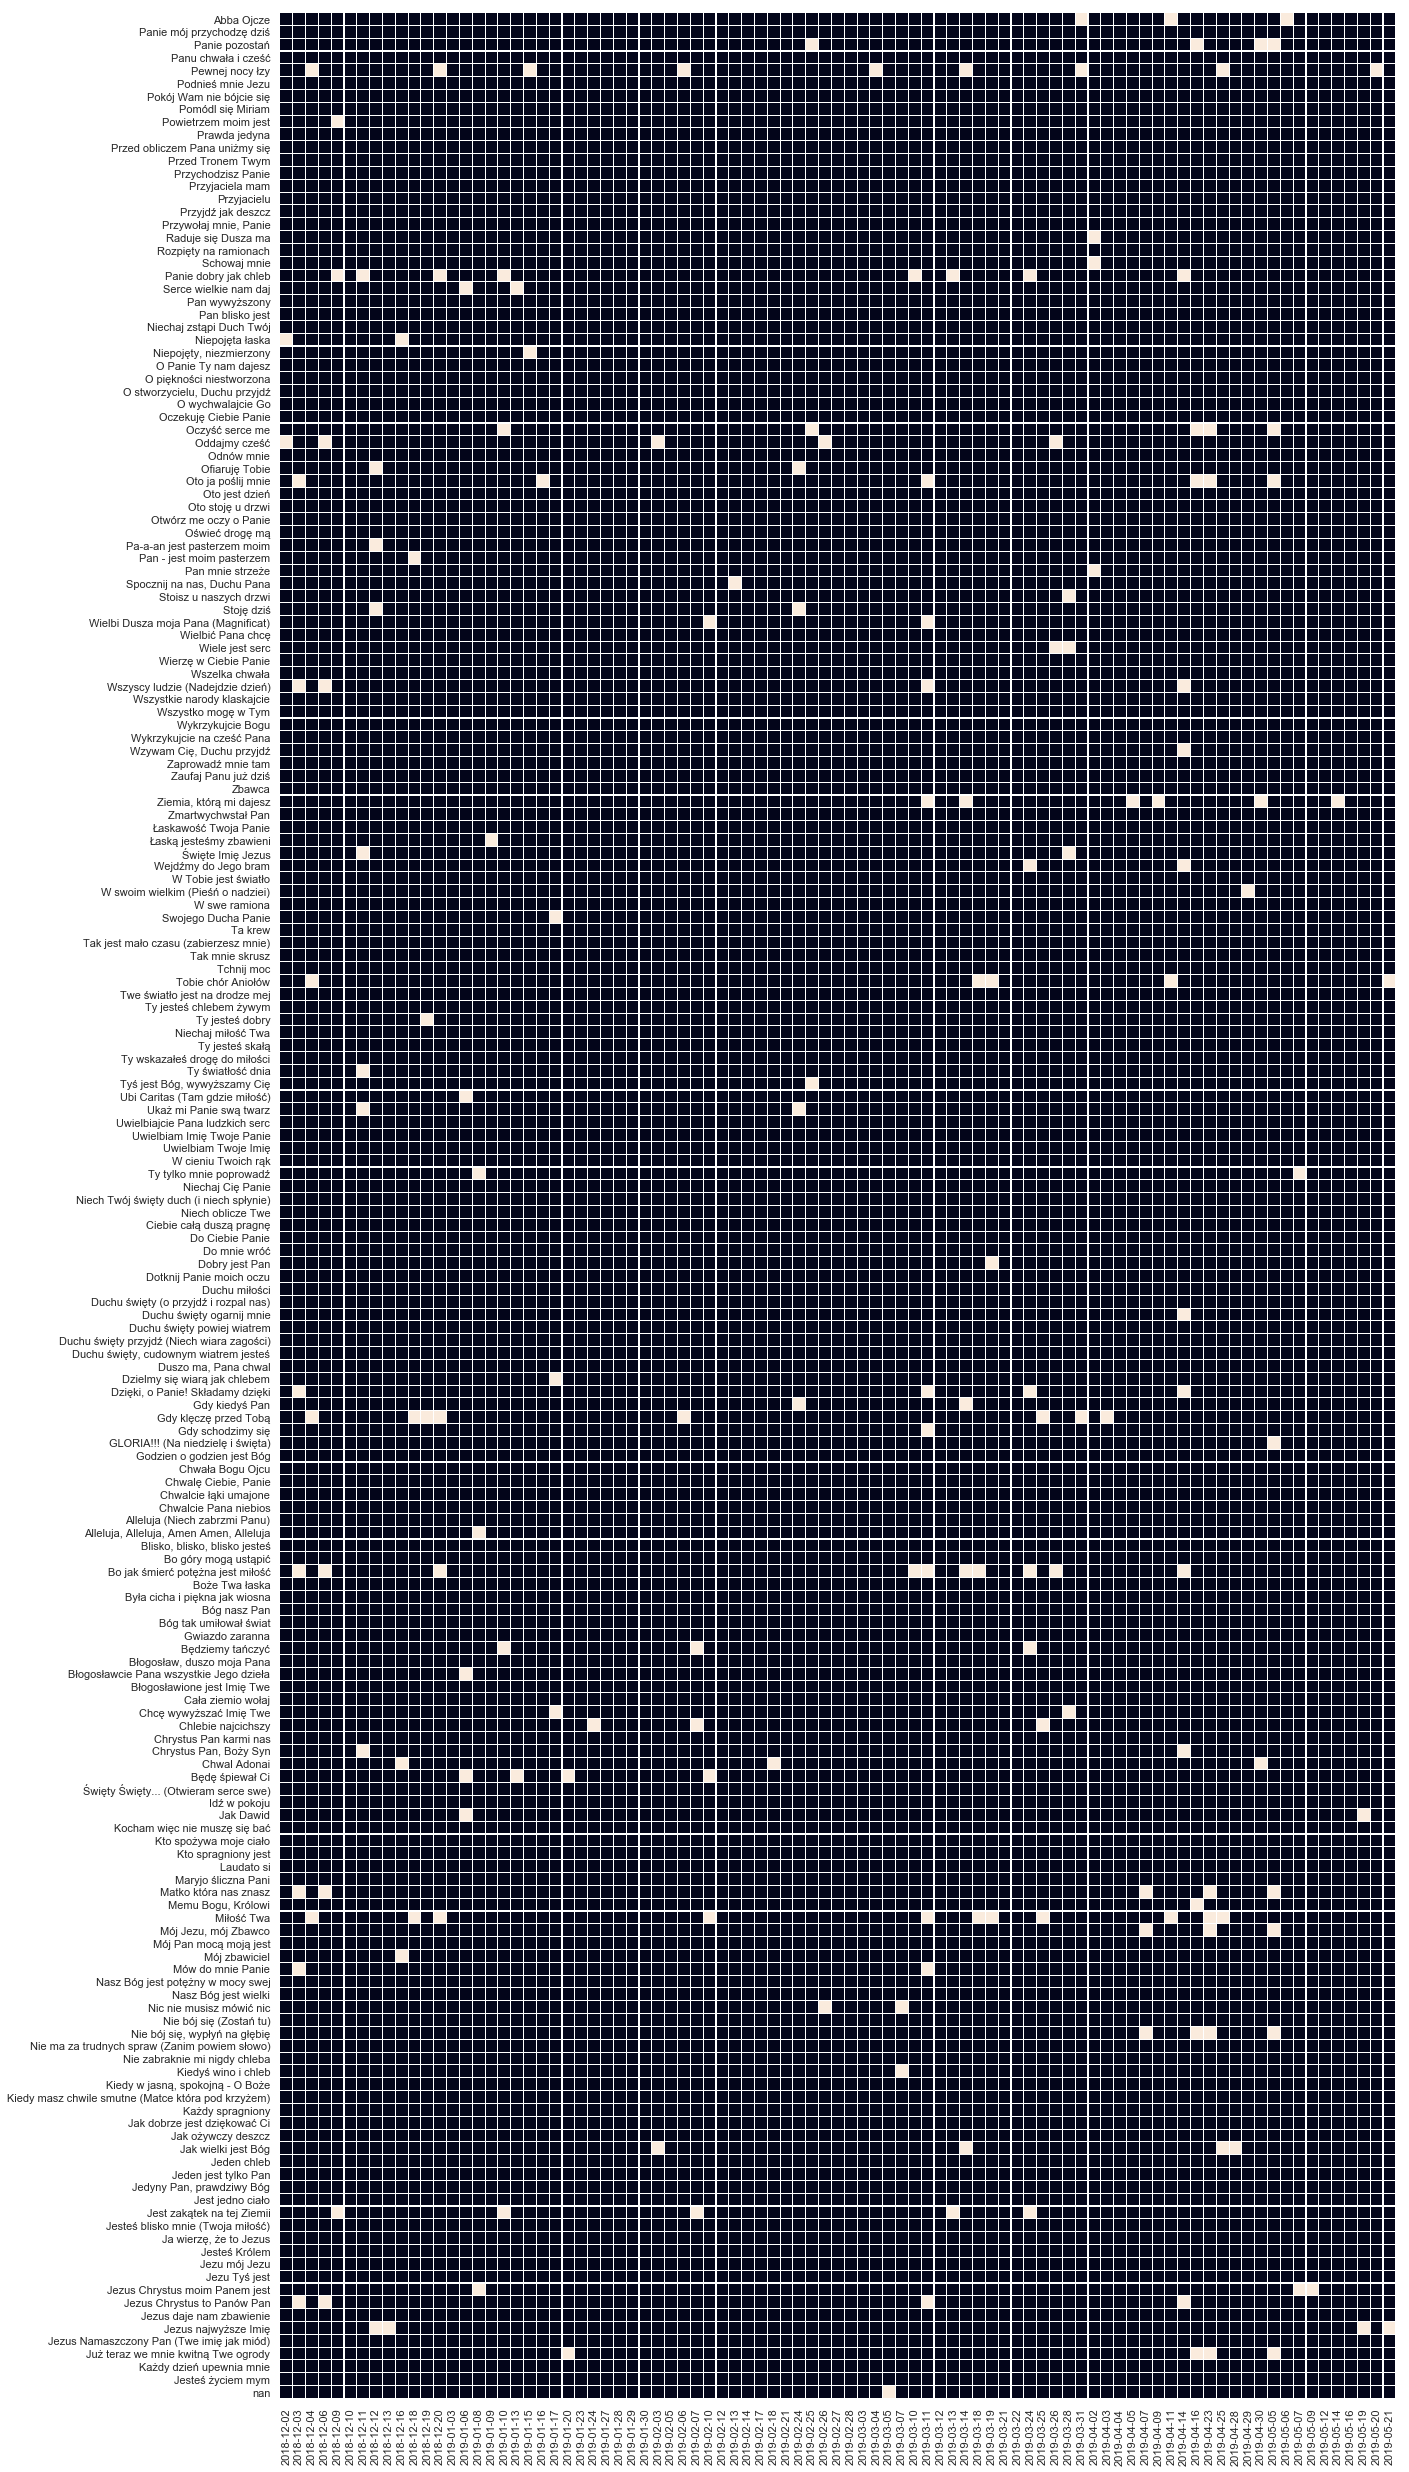

In [34]:
plt.figure(figsize=(20,60))
sns.set(font_scale=1)
sns.heatmap(sim >= 0.5, cbar=False, annot=False, #xticklabels= titles, 
            yticklabels = titles, 
            xticklabels= dates,
            square=True,
           linewidths=.09
           )
plt.xticks(rotation=90) 
plt.show()

### Check

In [15]:
df_s = pd.read_csv('../CSV/piosenki_pl_en.csv', header=0, names=['txt_pl', 'txt_en'], index_col=0)
df_s.head()

,txt_pl,txt_en
Abba Ojcze,Ty wyzwoliłeś nas Panie z kajdan i samych sie...,"You delivered us from chains and ourselves, an..."
Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Nie...","Alleluia, Alleluia, Alleluia, Alleluia. Let th..."
"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. ...","Alleluia, Alleluia, Amen, Amen, Alleluia. Let ..."
"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisk...","Close, close, close You are my Lord, Close to ..."
Bo góry mogą ustąpić,Bo góry mogą ustąpić i pagórki się zachwiać. ...,Because the mountains can give way and the hil...


In [16]:
df_r = pd.read_csv('../CSV/prep_readings_pl_FILTERED.csv', header=0, index_col=0)
df_r.head(2)

,Pierwsze czytanie,Psalm_ref,Psalm,Ewangelia,total,Pierwsze czytanie_tokenized_lower_nostops,Psalm_ref_tokenized_lower_nostops,Psalm_tokenized_lower_nostops,Ewangelia_tokenized_lower_nostops,total_tokenized_lower_nostops
2018-12-20,Pan przemówił do Achaza tymi słowami: „Proś dl...,"Przybądź, o Panie, Tyś jest Królem chwały","Do Pana należy ziemia i wszystko, co ją napełn...",Bóg posłał anioła Gabriela do miasta w Galilei...,Pan przemówił do Achaza tymi słowami: „Proś dl...,"['przemówił', 'achaza', 'tymi', 'słowami', 'pr...","['przybądź', 'panie', 'tyś', 'królem', 'chwały']","['należy', 'ziemia', 'napełnia', 'świat', 'mie...","['bóg', 'posłał', 'anioła', 'gabriela', 'miast...","['przemówił', 'achaza', 'tymi', 'słowami', 'pr..."
2018-12-19,"W Sorea, w pokoleniu Dana, żył pewien mąż imie...","Będę opiewał chwałę Twoją, Boże",Bądź dla mnie skałą schronienia i zamkiem wa...,"Za czasów Heroda, króla Judei, żył pewien kapł...","W Sorea, w pokoleniu Dana, żył pewien mąż imie...","['sorea', 'pokoleniu', 'dana', 'żył', 'pewien'...","['opiewał', 'chwałę', 'twoją', 'boże']","['bądź', 'skałą', 'schronienia', 'zamkiem', 'w...","['czasów', 'heroda', 'króla', 'judei', 'żył', ...","['sorea', 'pokoleniu', 'dana', 'żył', 'pewien'..."


In [22]:
print(df_s.iloc[9]['txt_pl'])
print()
print(df_r.iloc[54]['Ewangelia'])

 Bóg tak umiłował świat, że Syna swego Jednorodzonego dał, aby każdy kto w Niego wierzy nie zginął, ale życie wieczne miał.  O Jezus, Jezus, Jezus! 

Gdy Jezus z Piotrem, Jakubem i Janem zstąpił z góry i przyszedł do uczniów, ujrzał wielki tłum wokół nich i uczonych w Piśmie, którzy rozprawiali z nimi. Skoro Go zobaczyli, zaraz podziw ogarnął cały tłum i przybiegając, witali Go. On ich zapytał: "O czym rozprawiacie z nimi?" Jeden z tłumu odpowiedział Mu: "Nauczycielu, przyprowadziłem do Ciebie mojego syna, który ma ducha niemego. Ten, gdziekolwiek go pochwyci, rzuca nim, a on wtedy się pieni, zgrzyta zębami i drętwieje. Powiedziałem Twoim uczniom, żeby go wyrzucili, ale nie mogli". Odpowiadając im, Jezus rzekł: "O plemię niewierne, jak długo mam być z wami? Jak długo mam was znosić? Przyprowadźcie go do Mnie!" I przywiedli go do Niego. Na widok Jezusa duch zaraz począł miotać chłopcem, tak że upadł na ziemię i tarzał się z pianą na ustach. Jezus zapytał ojca: "Od jak dawna to mu się zd

In [25]:
print(df_s.loc['Abba Ojcze']['txt_pl'])
print()
print(df_r.loc['2019-05-06']['total'])

Ty wyzwoliłeś nas Panie  z kajdan i samych siebie,  a Chrystus stając się bratem  nauczył nas wołać do Ciebie:  Abba Ojcze! Abba Ojcze! Abba Ojcze!  Bo Kościół jak drzewo życia w wieczności zapuszcza korzenie, przenika naszą codzienność i pokazuje nam Ciebie. Abba Ojcze! Abba Ojcze! Abba Ojcze!  Bóg hojnym Dawcą jest życia, on wyswobodził nas z śmierci i przygarniając do siebie uczynił swoimi dziećmi. Abba Ojcze! Abba Ojcze! Abba Ojcze!  Wszyscy jesteśmy braćmi, jesteśmy jedną rodziną. Tej prawdy nic już nie zaćmi i teraz jest jej godzina. Abba Ojcze! Abba Ojcze! Abba Ojcze! 

Przypominam, bracia, Ewangelię, którą wam głosiłem, którąście przyjęli i w której też trwacie. Przez nią również będziecie zbawieni, jeżeli ją zachowacie tak, jak wam rozkazałem... Chyba żebyście uwierzyli na próżno. Przekazałem wam na początku to, co przejąłem; że Chrystus umarł - zgodnie z Pismem - za nasze grzechy, że został pogrzebany, że zmartwychwstał trzeciego dnia, zgodnie z Pismem; i że ukazał się Kefaso

In [27]:
print(df_s.loc['Duchu ']['txt_pl'])
print()
print(df_r.loc['2018-12-12']['total'])

Ty wyzwoliłeś nas Panie  z kajdan i samych siebie,  a Chrystus stając się bratem  nauczył nas wołać do Ciebie:  Abba Ojcze! Abba Ojcze! Abba Ojcze!  Bo Kościół jak drzewo życia w wieczności zapuszcza korzenie, przenika naszą codzienność i pokazuje nam Ciebie. Abba Ojcze! Abba Ojcze! Abba Ojcze!  Bóg hojnym Dawcą jest życia, on wyswobodził nas z śmierci i przygarniając do siebie uczynił swoimi dziećmi. Abba Ojcze! Abba Ojcze! Abba Ojcze!  Wszyscy jesteśmy braćmi, jesteśmy jedną rodziną. Tej prawdy nic już nie zaćmi i teraz jest jej godzina. Abba Ojcze! Abba Ojcze! Abba Ojcze! 

„Z kimże byście mogli Mnie porównać, tak, żeby Mi dorównał?” — mówi Święty. Podnieście oczy w górę i patrzcie: Kto stworzył te gwiazdy? Ten, który w szykach prowadzi ich wojsko, wszystkie je woła po imieniu. Spod takiej potęgi i olbrzymiej siły nikt się nie uchyli. Czemu mówisz, Jakubie, i ty, Izraelu, powtarzasz: „Zakryta jest moja droga przed Panem i prawo me przed Bogiem przeoczone?” Czy nie wiesz tego? Czyś n

In [24]:
print(df_r.iloc[33]['Ewangelia'])

Po wyjściu z synagogi Jezus przyszedł z Jakubem i Janem do domu Szymona i Andrzeja. Teściowa zaś Szymona leżała w gorączce. Zaraz powiedzieli Mu o niej. On podszedł i podniósł ją, ująwszy za rękę, a opuściła ją gorączka. I usługiwała im. Z nastaniem wieczora, gdy słońce zaszło, przynosili do Niego wszystkich chorych i opętanych; i całe miasto zebrało się u drzwi. Uzdrowił wielu dotkniętych rozmaitymi chorobami i wiele złych duchów wyrzucił, lecz nie pozwalał złym duchom mówić, ponieważ Go znały.Nad ranem, kiedy jeszcze było ciemno, wstał, wyszedł i udał się na miejsce pustynne, i tam się modlił. Pośpieszył za Nim Szymon z towarzyszami, a gdy Go znaleźli, powiedzieli Mu: "Wszyscy Cię szukają". Lecz On rzekł do nich: "Pójdźmy gdzie indziej, do sąsiednich miejscowości, abym i tam mógł nauczać, bo po to wyszedłem". I chodził po całej Galilei, nauczając w ich synagogach i wyrzucając złe duchy.


In [78]:
print(df_s.loc['Błogosław, duszo moja Pana']['txt_pl'])
print()
print(df_s.loc['Błogosławcie Pana wszystkie Jego dzieła']['txt_pl'])

 Błogosław duszo moja Pana, wszystko, co we mnie, Jego najświętsze imię. Błogosław duszo moja Pana, jego dobroci nigdy nie zapominaj.  On odpuszcza wszystkie twoje grzechy, leczy wszystkie twoje choroby. Okazuje Swoje miłosierdzie,  On ratuje Ciebie od zguby. On napełnia twoje życie dobrem, aż odnowi się twoja młodość, jak u orła. Nie odpłaca według grzechów, nie chce wiecznie gniewać się. On pamięta żeśmy prochem, on najlepiej wie!  Błogosław duszo moja Pana, wszystko, co we mnie, Jego najświętsze imię. Błogosław duszo moja Pana, jego dobroci nigdy nie zapominaj.  Tak jak ojciec nad swoimi dziećmi, Pan lituje się nad pokornym. On oddala od nas nasze winy jak daleko wschód od zachodu. Jak wysoko niebo jest nad ziemią, tak jest wielka dobroć dla ludzi, którzy się Go boją. Dni człowieka są jak trawa,  kwitnie On jak polny kwiat. Kiedy mocniej wiatr zawieje, znika po nim ślad!  Błogosław duszo moja Pana, wszystko, co we mnie, Jego najświętsze imię. Błogosław duszo moja Pana, jego dobroci 

## Jaccard similarity

In [2]:
prep_songs = pd.read_csv('../CSV/prep_songs.csv', header=0, index_col=0)
prep_songs.head()

,title_pl,txt_pl,txt_en,txt_pl_tokenized,txt_en_tokenized,txt_en_lower_nostops,txt_pl_tokenized_lower_nostops,txt_en_tokenized_lower_nostops,txt_en_tokenized_lower_nostops_stemmed,txt_en_tokenized_lower_nostops_lemmatized
0,Abba Ojcze,Ty wyzwoliłeś nas Panie z kajdan i samych sie...,"You delivered us from chains and ourselves, an...","['Ty', 'wyzwoliłeś', 'nas', 'Panie', 'z', 'kaj...","['You', 'delivered', 'us', 'from', 'chains', '...","['y', 'e', 'l', 'v', 'e', 'r', 'e', 'f', 'r', ...","['ty', 'wyzwoliłeś', 'panie', 'kajdan', 'samyc...","['you', 'delivered', 'us', 'chains', 'christ',...","['you', 'deliv', 'us', 'chain', 'christ', 'bec...","['you', 'delivered', 'u', 'chain', 'christ', '..."
1,Alleluja (Niech zabrzmi Panu),"Alleluja, Alleluja, Alleluja, Alleluja. Nie...","Alleluia, Alleluia, Alleluia, Alleluia. Let th...","['Alleluja', 'Alleluja', 'Alleluja', 'Alleluja...","['Alleluia', 'Alleluia', 'Alleluia', 'Alleluia...","['a', 'l', 'l', 'e', 'l', 'a', 'l', 'l', 'e', ...","['alleluja', 'alleluja', 'alleluja', 'alleluja...","['alleluia', 'alleluia', 'alleluia', 'alleluia...","['alleluia', 'alleluia', 'alleluia', 'alleluia...","['alleluia', 'alleluia', 'alleluia', 'alleluia..."
2,"Alleluja, Alleluja, Amen Amen, Alleluja","Alleluja, Alleluja, Amen, Amen, Alleluja. ...","Alleluia, Alleluia, Amen, Amen, Alleluia. Let ...","['Alleluja', 'Alleluja', 'Amen', 'Amen', 'Alle...","['Alleluia', 'Alleluia', 'Amen', 'Amen', 'Alle...","['a', 'l', 'l', 'e', 'l', 'a', 'l', 'l', 'e', ...","['alleluja', 'alleluja', 'amen', 'amen', 'alle...","['alleluia', 'alleluia', 'amen', 'amen', 'alle...","['alleluia', 'alleluia', 'amen', 'amen', 'alle...","['alleluia', 'alleluia', 'amen', 'amen', 'alle..."
3,"Blisko, blisko, blisko jesteś","Blisko, blisko, blisko Jesteś Panie mój Blisk...","Close, close, close You are my Lord, Close to ...","['Blisko', 'blisko', 'blisko', 'Jesteś', 'Pani...","['Close', 'close', 'close', 'You', 'are', 'my'...","['c', 'l', 'e', 'c', 'l', 'e', 'c', 'l', 'e', ...","['blisko', 'blisko', 'blisko', 'jesteś', 'pani...","['close', 'close', 'close', 'you', 'lord', 'cl...","['close', 'close', 'close', 'you', 'lord', 'cl...","['close', 'close', 'close', 'you', 'lord', 'cl..."
4,Bo góry mogą ustąpić,Bo góry mogą ustąpić i pagórki się zachwiać. ...,Because the mountains can give way and the hil...,"['Bo', 'góry', 'mogą', 'ustąpić', 'i', 'pagórk...","['Because', 'the', 'mountains', 'can', 'give',...","['b', 'e', 'c', 'e', 'h', 'e', 'n', 'n', 'c', ...","['bo', 'góry', 'ustąpić', 'pagórki', 'zachwiać...","['because', 'mountains', 'give', 'way', 'hills...","['becaus', 'mountain', 'give', 'way', 'hill', ...","['because', 'mountain', 'give', 'way', 'hill',..."


In [30]:
from sklearn.metrics import pairwise_distances

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


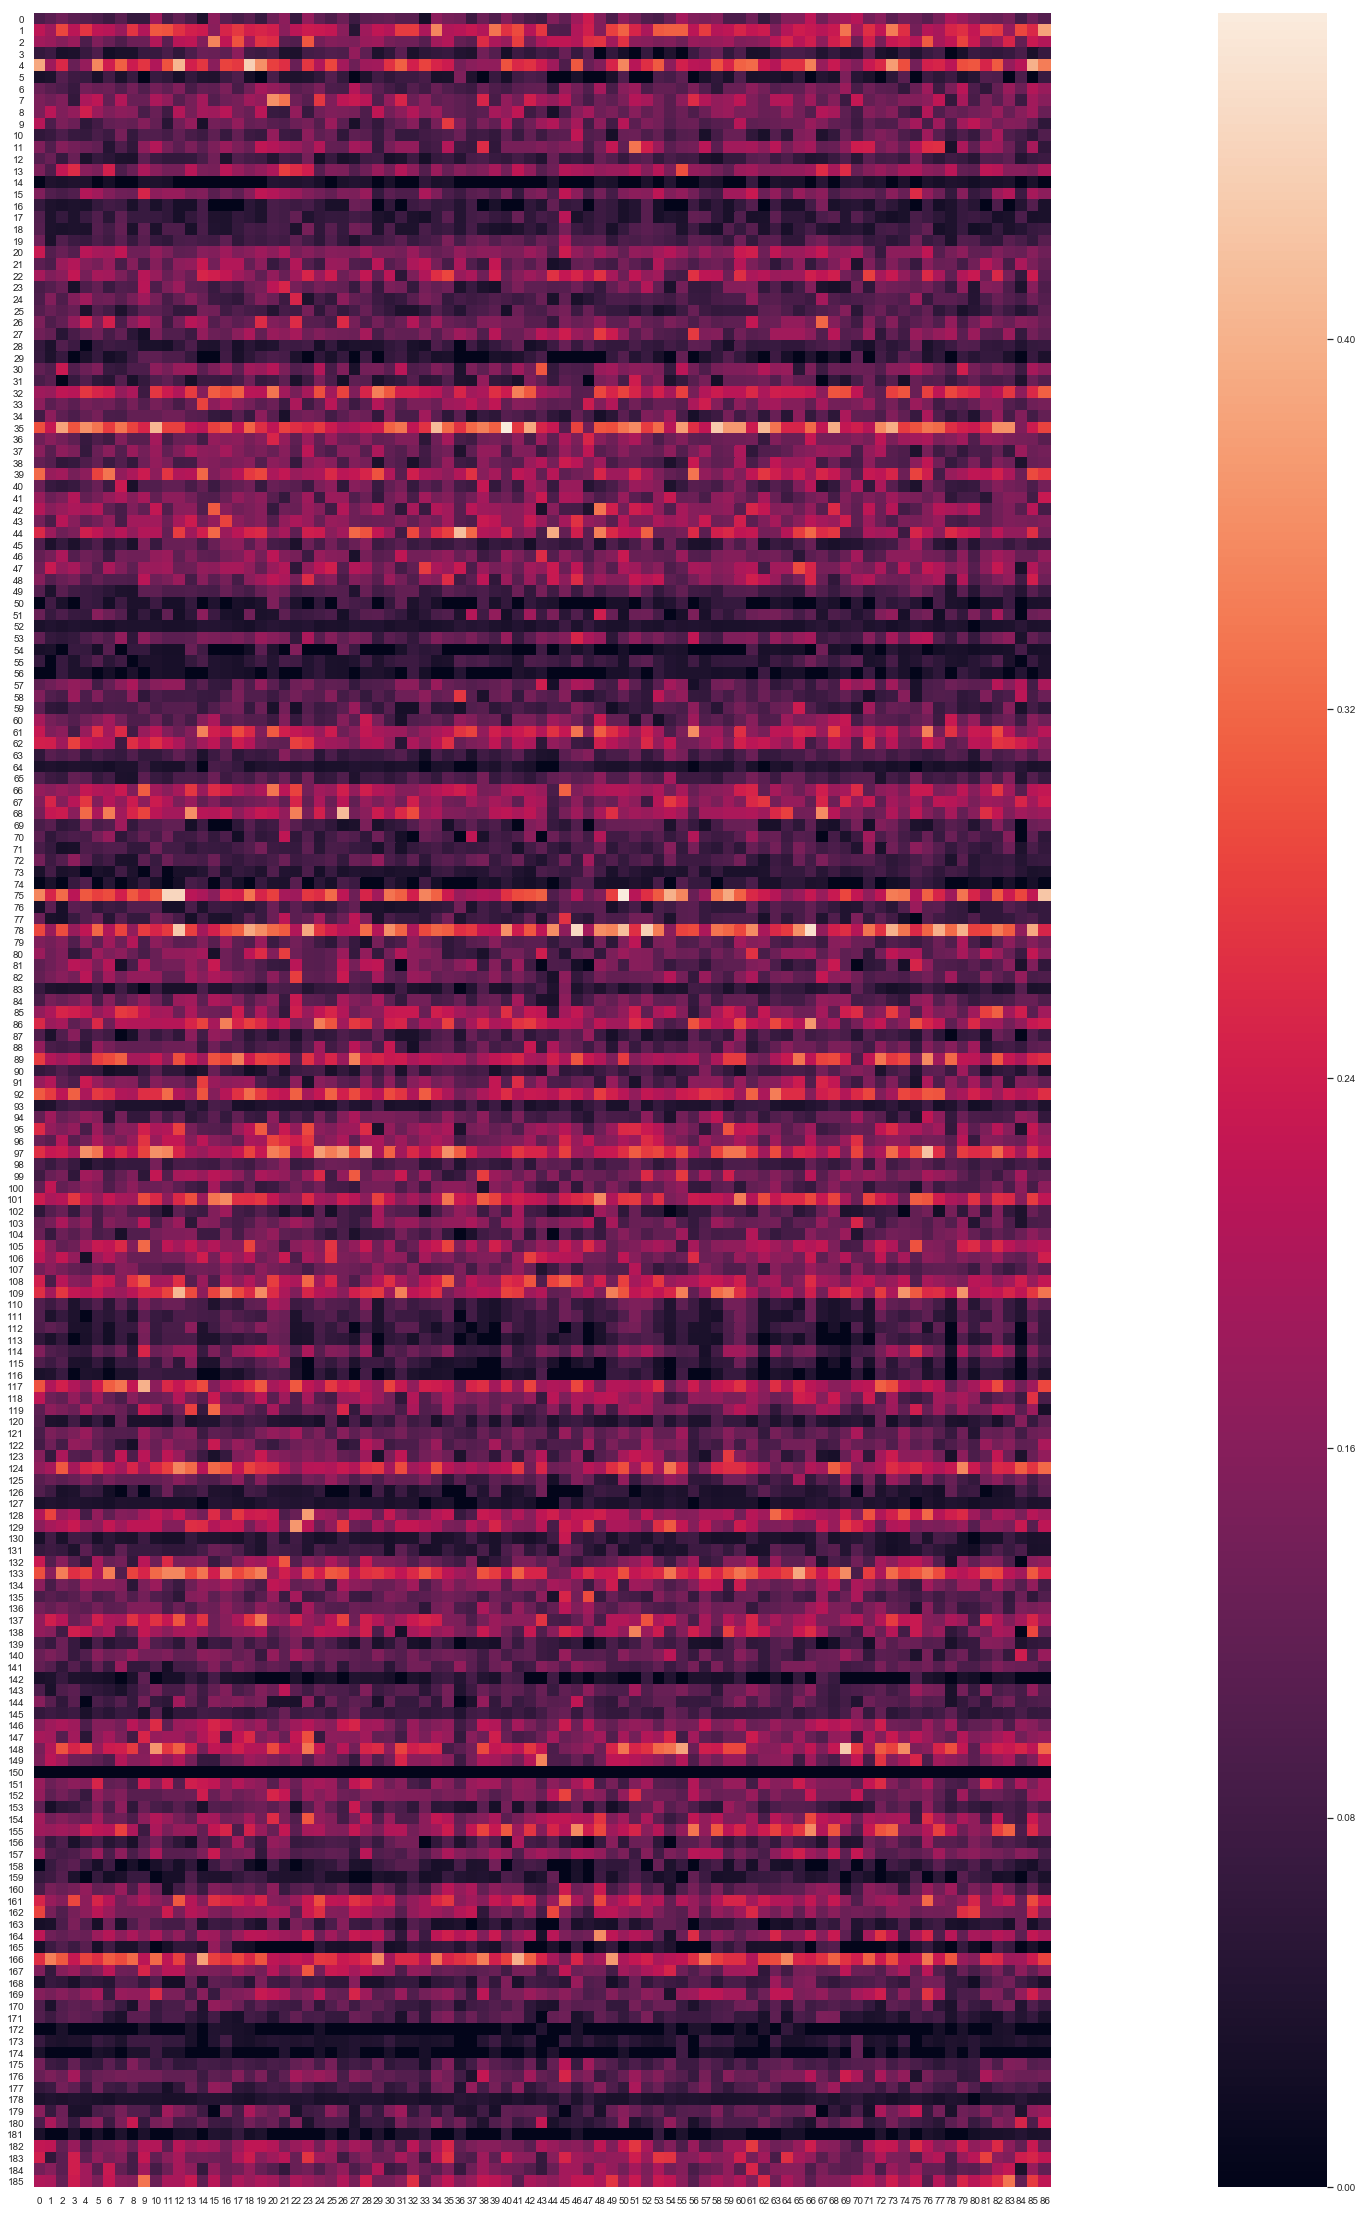

In [31]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(1 - pairwise_distances(df_songs_tfidf, df_readings_tfidf, metric = "jaccard"), cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

In [53]:
df_s = pd.read_csv('../CSV/piosenki_pl_en.csv', header=0)
print(df_s.shape)
df_r = pd.read_csv('../CSV/df_eng_gospel.csv', header=0)
print(df_r.shape)

(185, 3)
(128, 2)


In [60]:
print(df_s.iloc[119]['en'])
print()
print(df_r.iloc[38]['Ewangelia'])

Lord, stay, It's toward evening, Day has already been bent down.

On the first day after the Sabbath, Mary Magdalene ran and came to Simon Peter and the other disciple whom Jesus loved, and said to them, "The Lord is taken from the grave and we do not know where he was put." So Peter and the other disciple left and went to the grave. They both ran together, but the other student overtook Piotr and came first to the grave. And when he bent down, he saw the linen lying, but he did not go inside. Then Simon Peter followed, following him. He entered the interior of the grave and saw the linen lying and the scarf that was on His head, lying not together with the canvases, but separately rolled up in one place. Then also the second student came in, who came first to the grave. He saw and believed.


In [7]:
df_sim = pd.DataFrame(sim)

In [12]:
import matplotlib.pyplot as plt

<BarContainer object of 100 artists>

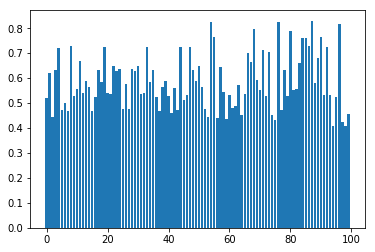

In [15]:
plt.bar(df_sim.columns, df_sim.max())